In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

C:\Users\jenny\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


입력으로 3개의 값을 받아 하나의 선형 출력을 생성하는 신경망을 정의

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

In [ ]:
2차원 입력을 받아 두 개의 ReLU 활성화 함수를 가진 은닉층(4유닛, 3유닛)을 거쳐, 하나의 선형 출력을 생성하는 신경망을 정의

In [4]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


red-wine.csv 데이터를 불러와 70%는 훈련 세트, 나머지는 검증 세트로 나누고, 각 세트의 데이터를 [0, 1] 범위로 정규화. 
이후, 입력(features)과 타겟(target)을 분리하여 X_train, X_valid에는 특성 데이터, y_train, y_valid에는 타겟 데이터(quality 열)를 저장한다.

In [5]:
print(X_train.shape)

(1119, 11)


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

C:\Users\jenny\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 11차원 입력을 받아, 3개의 512유닛 ReLU 활성화 층을 거친 후, 하나의 선형 출력을 생성하는 신경망 모델을 정의

In [7]:
model.compile(
    optimizer='adam',
    loss='mae',
)

모델을 컴파일하여 학습 준비를 한다. 
최적화 알고리즘으로 'adam'을 사용하고, 손실 함수로는 'mae' (Mean Absolute Error, 평균 절대 오차)를 사용하여 모델 성능을 평가한다.

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.3868 - val_loss: 0.1427
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1426 - val_loss: 0.1201
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1229 - val_loss: 0.1174
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1152 - val_loss: 0.1102
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1148 - val_loss: 0.1149
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1103 - val_loss: 0.1027
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1067 - val_loss: 0.1066
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1052 - val_loss: 0.0999
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1002 - val_loss: 0.1049
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1016 - val_loss: 0.1005


모델을 학습시키는 부분이다.
X_train과 y_train 데이터를 사용해 10번(epochs=10) 학습을 반복하며, 각 반복마다 256개 샘플씩 처리한다(batch_size=256). 
X_valid와 y_valid 검증 데이터를 통해 각 에포크가 끝날 때마다 모델 성능을 평가한다. 학습 결과는 history 객체에 저장된다.

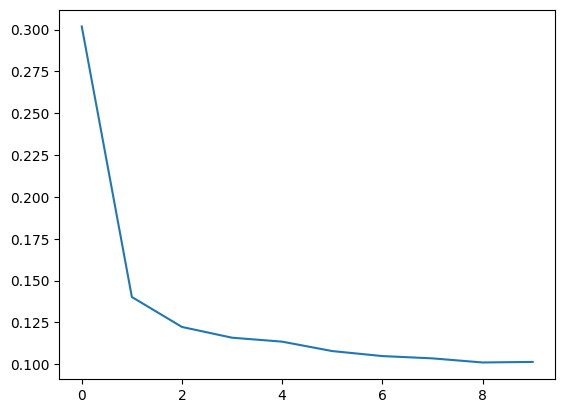

In [9]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

모델 학습 결과를 pandas 데이터프레임으로 변환한 후, 학습 중 발생한 손실 값(loss)을 시각화하는 부분이다. 
history.history에는 각 에포크마다 기록된 손실 값과 검증 성능이 저장되는데, 이를 데이터프레임으로 변환한 후, loss 열에 대해 선 그래프를 그린다.

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

코드는 모델 학습 중 개선이 없을 때 학습을 자동으로 멈추기 위한 EarlyStopping 콜백을 설정한다.

min_delta=0.001: 손실이 0.001 이상 개선되어야 향상된 것으로 간주한다.
patience=20: 성능이 개선되지 않는 에포크가 20번 연속 발생하면 학습을 중단한다.
restore_best_weights=True: 학습이 중단되면 가장 성능이 좋았던 시점의 가중치를 복원한다.

In [11]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


와인 데이터를 훈련 세트와 검증 세트로 나누고, 데이터를 [0, 1] 사이로 정규화한 후, 입력(특성)과 타겟(라벨)을 분리하는 과정이다. 
red_wine.csv 파일에서 데이터를 불러오고 데이터의 70%를 무작위로 선택하여 훈련 세트(df_train)로, 나머지를 검증 세트(df_valid)로 나눈다
각 특성의 최대값과 최소값을 사용하여 훈련 및 검증 데이터를 [0, 1] 범위로 정규화하고 
타겟 열인 quality를 제외한 데이터(X_train, X_valid)와 타겟 값(y_train, y_valid)을 각각 분리하여 입력과 출력으로 사용하도록 준비한다.

In [12]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

C:\Users\jenny\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


와인 데이터에 대한 회귀 문제를 해결하기 위해 신경망을 설정하고, 조기 종료(Early Stopping) 기능을 추가하여 학습을 최적화하는 과정이다. 

min_delta=0.001: 손실이 0.001 이상 감소해야 성능 향상으로 간주.
patience=20: 20번의 에포크 동안 성능 개선이 없으면 학습을 중단.
restore_best_weights=True: 성능이 가장 좋았던 시점의 가중치를 복원.
세 개의 512 유닛을 가진 은닉층이 있으며, 각각 ReLU 활성화 함수를 사용.
입력 크기는 11개의 특성을 받고, 출력은 하나의 선형 값(회귀 문제)이 나옴.
최적화 함수로 Adam을 사용.
손실 함수로는 MAE(Mean Absolute Error, 평균 절대 오차)를 사용해 회귀 문제의 성능을 평가.

Minimum validation loss: 0.09185437858104706


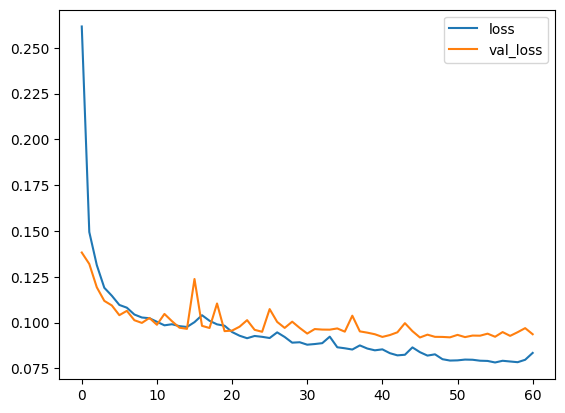

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

X_train, y_train: 훈련 데이터와 타겟 값.
validation_data=(X_valid, y_valid): 검증 데이터와 타겟 값으로 성능 평가.
batch_size=256: 각 에포크에서 256개의 샘플씩 처리.
epochs=500: 최대 500번의 에포크 동안 학습.
callbacks=[early_stopping]: 조기 종료 콜백을 리스트 형태로 추가하여 성능 개선이 없으면 학습을 중단.
verbose=0: 학습 로그 출력을 비활성화하여 출력되지 않도록 설정.
학습 과정에서 기록된 손실 값(history.history)을 pandas 데이터프레임으로 변환하여 저장.
데이터프레임에서 loss(훈련 손실)와 val_loss(검증 손실) 열을 선택해 시각화하여 학습 과정에서의 손실 변화를 그래프로 표시.
history_df['val_loss'].min()을 통해 검증 손실 값의 최소값을 찾아 출력

In [14]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('./red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

C:\Users\jenny\AppData\Local\Temp\ipykernel_18424\126288149.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


와인 품질 데이터셋을 불러와 훈련 세트와 검증 세트를 생성하고, 입력 특성과 타겟 값을 분리하는 과정.

matplotlib.pyplot을 사용하여 그래프를 그리기 위한 설정을 한다.
pd.read_csv('./red-wine.csv'): CSV 파일에서 데이터를 읽어와 red_wine 변수에 저장한다.

df_train: 데이터의 70%를 무작위로 샘플링하여 훈련 세트로 설정
df_valid: 훈련 세트에 포함되지 않은 나머지 데이터를 검증 세트로 설정

X_train: 훈련 세트에서 quality 열(타겟)을 제외한 나머지 특성 데이터를 포함
X_valid: 검증 세트에서 quality 열을 제외한 나머지 특성 데이터를 포함
y_train: 훈련 세트의 quality 열을 타겟으로 설정
y_valid: 검증 세트의 quality 열을 타겟으로 설정

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

C:\Users\jenny\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


모델 구조:
keras.Sequential: 순차적으로 레이어를 쌓아 구성된 모델

은닉층:
layers.Dense(1024, activation='relu', input_shape=[11]):
첫 번째 은닉층은 1024개의 유닛을 가지며, ReLU 활성화 함수를 사용
input_shape=[11]는 입력 데이터가 11개의 특성을 가진다는 것을 의미
layers.Dropout(0.3):
드롭아웃 레이어로, 학습 중 30%의 유닛을 무작위로 비활성화하여 과적합(overfitting)을 방지
layers.BatchNormalization():
배치 정규화 레이어로, 각 배치의 평균과 분산을 정규화하여 학습 안정성을 높이고, 수렴 속도를 향상시킴
layers.Dense(1024, activation='relu'):
두 번째 은닉층으로, 1024개의 유닛과 ReLU 활성화 함수를 사용
layers.Dropout(0.3) 및 layers.BatchNormalization():
두 번째 은닉층 뒤에도 드롭아웃과 배치 정규화 레이어를 추가하여 과적합 방지 및 학습 안정성을 높임.
layers.Dense(1024, activation='relu'):
세 번째 은닉층으로, 다시 1024개의 유닛과 ReLU 활성화 함수를 사용.
layers.Dropout(0.3) 및 layers.BatchNormalization():
세 번째 은닉층 뒤에도 드롭아웃과 배치 정규화 레이어를 추가.

출력층:
layers.Dense(1):
최종 출력층으로, 하나의 유닛을 가지며, 선형 활성화 함수를 사용하여 회귀 문제를 해결합니다. 이는 모델이 하나의 연속적인 값을 예측하도록 설계됨.

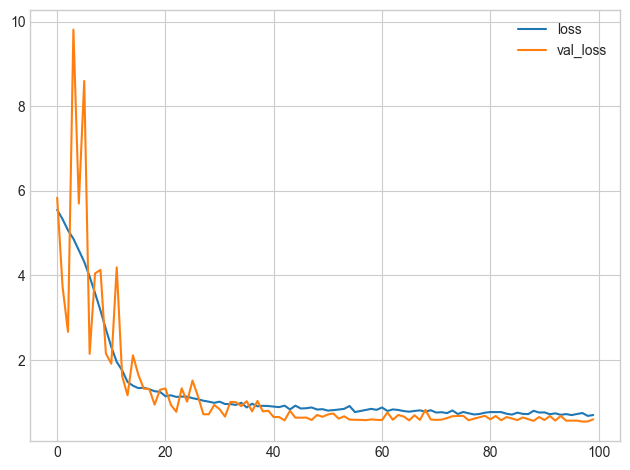

In [16]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

신경망 모델을 Adam 최적화 알고리즘과 평균 절대 오차(MAE) 손실 함수로 컴파일하고, 훈련 데이터로 100 에포크 동안 학습시킴. 
학습 과정에서의 손실 값과 검증 손실 값을 기록한 후, 이를 데이터프레임으로 변환하여 시각화함. 
이를 통해 모델의 학습 성과와 과적합 여부를 확인할 수 있음.

In [17]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('./ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


이 코드는 ion.csv 파일을 읽어와 데이터를 불러오고, 'good'과 'bad' 클래스를 0과 1로 매핑하여 새로운 클래스 열을 생성. 
데이터의 70%를 훈련 세트로, 나머지 30%를 검증 세트로 나누고, 각 세트를 0과 1 사이로 스케일링함. 
그 후, 비어 있는 특성을 제거한 후 특성과 타겟 값을 분리하고 최종적으로 X_train, X_valid는 입력 특성을, y_train, y_valid는 타겟 클래스를 저장함.

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

C:\Users\jenny\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33차원 입력을 받아 이진 분류 문제를 해결하기 위한 신경망 모델을 정의한다. 
모델은 두 개의 은닉층을 포함하며 각 은닉층은 4개의 유닛과 ReLU 활성화 함수를 사용한다. 
마지막 출력층은 1개의 유닛과 시그모이드 활성화 함수를 사용하여 0과 1 사이의 값을 출력하는데, 이는 이진 분류 확률을 나타낸다.

In [19]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

신경망 모델을 Adam 최적화 알고리즘을 사용하여 컴파일하며, 손실 함수로 이진 교차 엔트로피(binary_crossentropy)를 설정한다. 
또한, 평가 지표로 이진 정확도(binary_accuracy)를 추가하여 모델의 성능을 모니터링한다.

In [20]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

조기 중단(Early Stopping) 콜백을 설정하여 신경망 모델의 학습을 관리한다. 
조기 중단은 검증 손실이 10 에포크 동안 개선되지 않으면 학습을 중단하도록 설정되어 있으며, 이때 모델의 최적 가중치가 복원된다. 
이후 모델을 훈련시키면서 배치 크기를 512로 하고 최대 1000 에포크 동안 학습을 진행하지만, 출력은 숨겨진다(verbose=0).

Best Validation Loss: 0.5478
Best Validation Accuracy: 0.8000


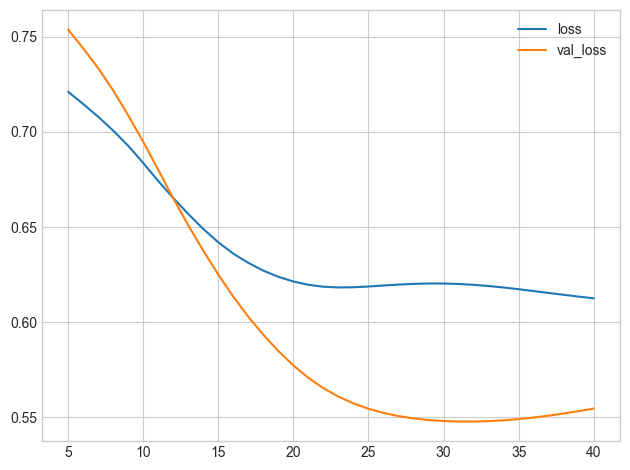

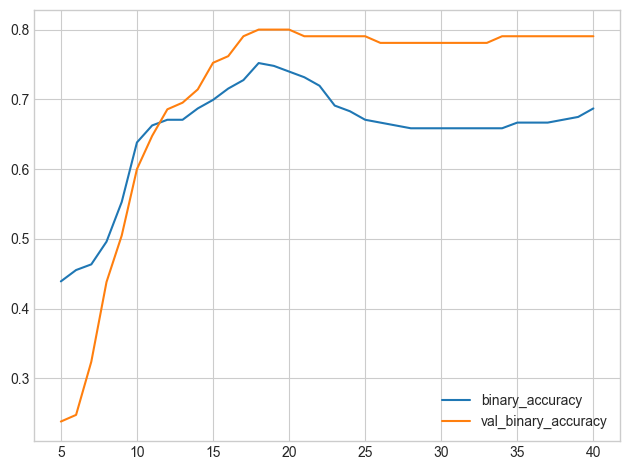

In [21]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

코드는 모델 학습의 손실과 정확도를 시각화하고, 최고의 검증 성능을 출력한다. 
먼저, 학습 결과 history.history를 데이터프레임으로 변환한 후, 5번째 에포크부터 손실(loss)과 정확도(binary_accuracy) 곡선을 그린다. 
마지막으로, 최상의 검증 손실과 검증 정확도를 출력하여 모델의 성능을 요약한다.